# 1. Понимание бизнеса

## 1.1. Цель

Целью настоящей работы является предсказание пользовательской оценки качества вина по его физико-химическим характеристикам.

## 1.2. Описание

В датасете приведена следующая информация по различным видам вин:
- type (разновидность вина - белое/красное)
- fixed acidity (фиксированная составляющая кислотности)
- volatile acidity (переменная составляющая кислотности)
- citric acid (лимонная кислота)
- residual sugar (остаточный сахар)
- chlorides (хлориды)
- free sulfur dioxide (свободный диоксид серы)
- total sulfur dioxide (общий уровень диоксида серы)
- density (плотность)
- pH (кислотно-щелочной баланс)
- sulphates (сульфаты)
- alcohol (содержание алкоголя)
- quality (оценка качества вина - целевая переменная)

Целевая переменная является пользовательскими оценками общего качества вина. Является категориальной переменной и оценивается от 1 до 10 (при этом в датасете имеются не все возможные оценки).

Задачу теоретически можно рассматривать и как задачу классификации, так и задачу регрессии, но в данном ноутбуке к ней применен подход как к задаче классификации.

# 2. Data understanding

## 2.1. Import libraries

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pickle
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

## 2.2. Загрузка данных

In [7]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## 2.3. Статистика и визуализации

### 2.3.1. Ключевая информация о переменных

In [9]:
# числовые признаки
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# категориальные переменные
data.describe(include='object')

,type
count,6497
unique,2
top,white
freq,4898


In [11]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [12]:
# целевая переменная
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Распределение целевой переменной сильно не сбалансировано

### 2.3.2. Тепловая карта корреляции

<Axes: >

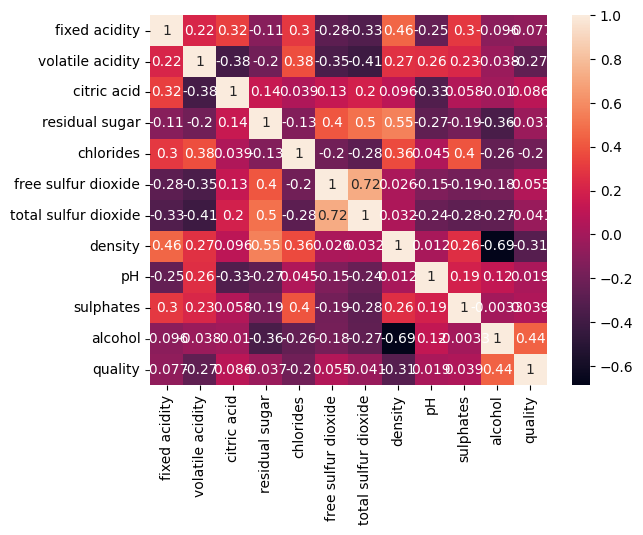

In [14]:
sns.heatmap(data.corr(), annot=True, fmt='.2g', xticklabels=True, yticklabels=True)

Выводы:

1) ярко выраженная коллинеарность данных отсутствует (максимальная корреляция между признаками - -0.69). Удаление признаков для ухода от коллинеарности не требуется.

2) отсутствуют признаки, сильно коррелярующие с целевой переменной (максимальный коэффициент корреляции - 0.44)

type


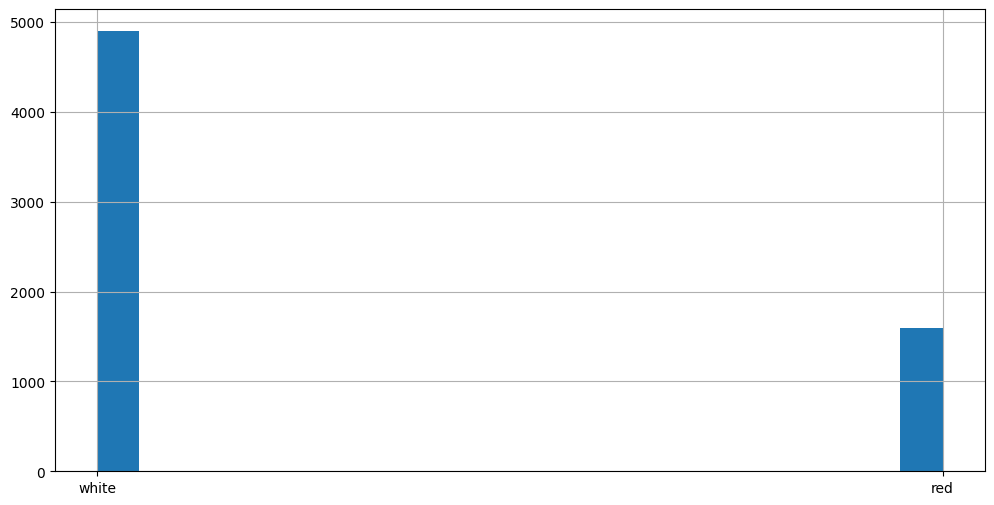


fixed acidity


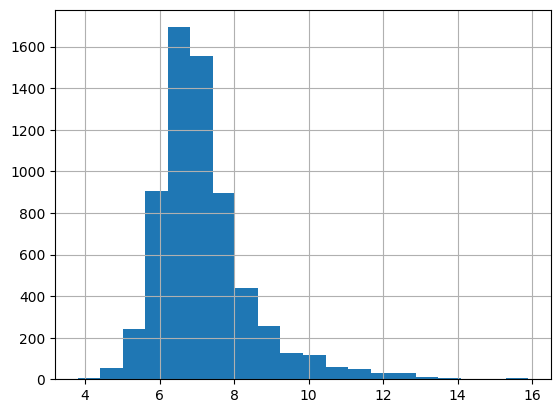


volatile acidity


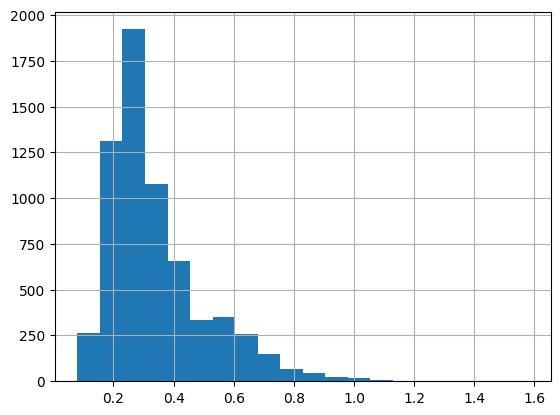


citric acid


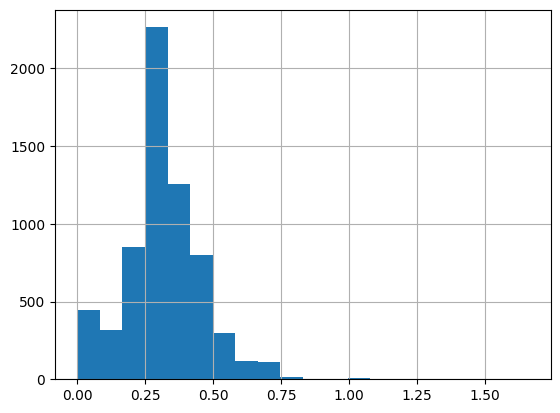


residual sugar


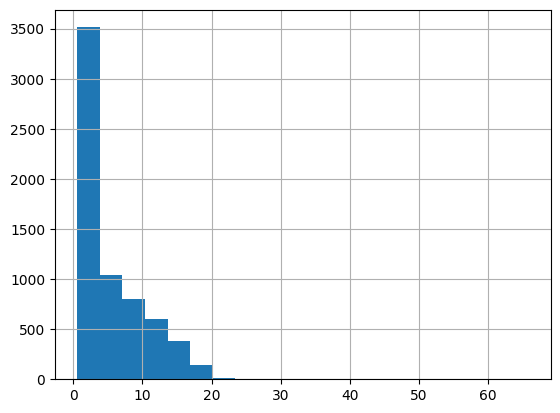


chlorides


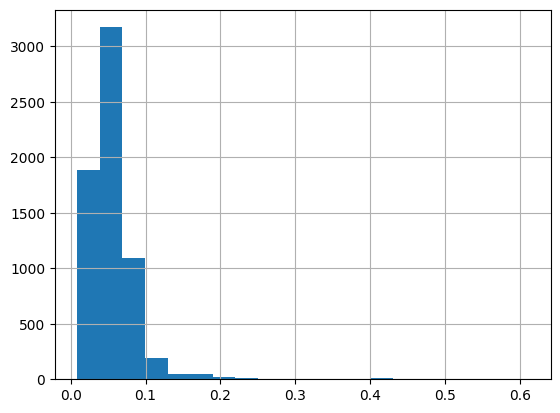


free sulfur dioxide


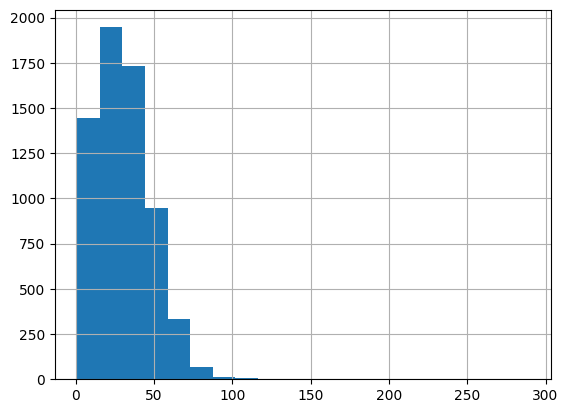


total sulfur dioxide


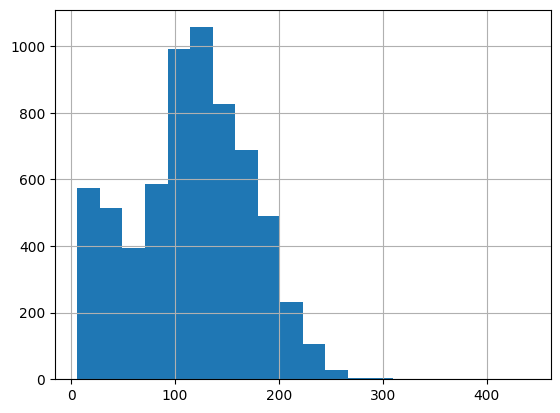


density


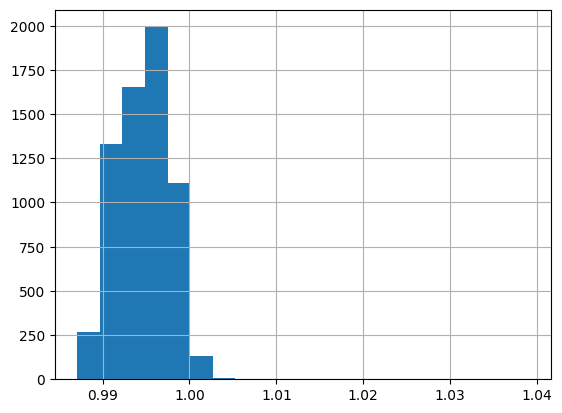


pH


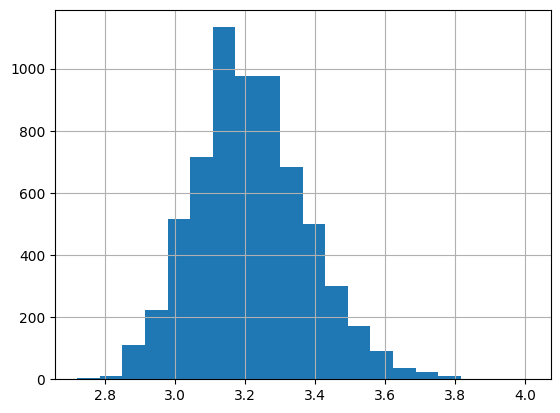


sulphates


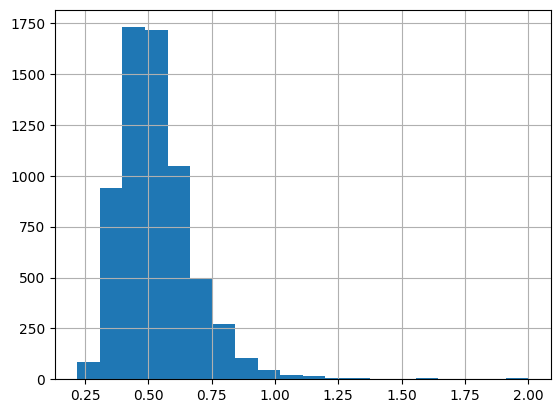


alcohol


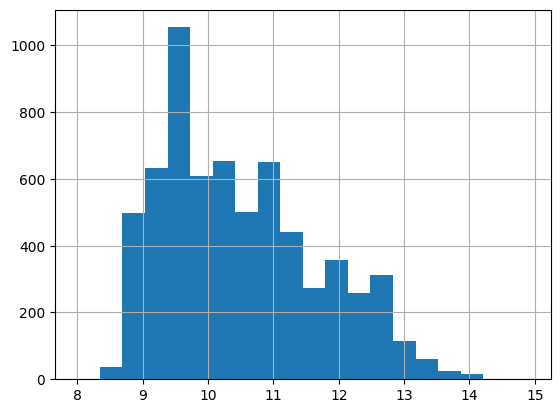


quality


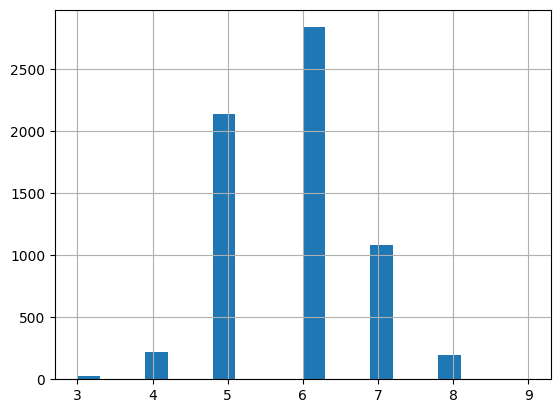

In [19]:
figure(figsize=(12, 6))

for feat in data.columns:
    print(feat)
    data[feat].hist(bins=20)
    plt.show()
    print()

Выводы:
- среди признаком практически отсутствуют признаки с нормальным распределением
- распределение целевой переменной не сбалансировано, часть возможных значений - отсутствует

# 3. Data preparation

## 3.1. Преобразование категориальных переменных

In [20]:
# 0 - для белых вин, 1 - для красных
data['type'] = data['type'].apply(lambda x: 1 if x=='red' else 0)
data['type'].value_counts()

0    4898
1    1599
Name: type, dtype: int64

## 3.2. Заполнение пропусков

In [21]:
# определение доли (в %) пропусков
data.isnull().sum()/len(data)*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

С учетом незначительного количества пропусков, оптимальным выглядит решение удалить соответствующие записи

In [23]:
data = data.dropna()
data.isnull().sum()/len(data)*100

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [24]:
len(data)

6463

Удалено 34 записи из ~7000 (менее 0.5%)

## 3.3. Feature engineering - добавление новых признаков

Исходя из специфики датасета, добавление новых признаков не целесообразно

In [25]:
# Определение наименее полезных признаков (SFS):
knn = KNeighborsClassifier()
X_prep = data.drop('quality', axis=1)
y_prep = data['quality']
n_features_sfs = 9    # произвольно определяем искомое количество фич (всего в датасете - 12)
sfs = SequentialFeatureSelector(knn, n_features_to_select=n_features_sfs)
sfs.fit(X_prep, y_prep)
recs_sfs = pd.DataFrame([X_prep.columns, sfs.get_support()]).T
recs_sfs

,0,1
0,type,False
1,fixed acidity,False
2,volatile acidity,True
3,citric acid,True
4,residual sugar,True
5,chlorides,True
6,free sulfur dioxide,True
7,total sulfur dioxide,False
8,density,True
9,pH,True


Рекомендованные к исключению признаки (SFS):
- type
- fixed acidity
- total sulfur dioxide

In [26]:
# дополнительно сравним с feature importance для randomforest:

names = data.columns[:-1]
model = RandomForestClassifier()
model.fit(X_prep, y_prep)

dic = {}

for i in range(len(names)):
    dic[names[i]] = model.feature_importances_[i]

print('Важность признаков в модели (по убыванию):')

for k, v in sorted(dic.items(), key=lambda x: x[1], reverse=True):
    print(f'{k}:  {v:4f}')

Важность признаков в модели (по убыванию):
alcohol:  0.122173
density:  0.101367
volatile acidity:  0.099275
total sulfur dioxide:  0.091429
chlorides:  0.087937
sulphates:  0.086930
free sulfur dioxide:  0.085645
residual sugar:  0.084449
pH:  0.084182
citric acid:  0.077808
fixed acidity:  0.075158
type:  0.003646


Рекомендованные к исключению признаки (RF FI):
- type
- fixed acidity
- citric acid

Вывод:
- при построении моделей не будем использовать признаки "fixed acidity" и "type", т.к. оба метода показали их низкую предсказательную важность

## 3.4. Сборка финального датасета для моделирования

In [27]:
df = data.drop(['fixed acidity', 'type'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      6463 non-null   float64
 1   citric acid           6463 non-null   float64
 2   residual sugar        6463 non-null   float64
 3   chlorides             6463 non-null   float64
 4   free sulfur dioxide   6463 non-null   float64
 5   total sulfur dioxide  6463 non-null   float64
 6   density               6463 non-null   float64
 7   pH                    6463 non-null   float64
 8   sulphates             6463 non-null   float64
 9   alcohol               6463 non-null   float64
 10  quality               6463 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 605.9 KB


In [28]:
X = df.drop(['quality'], axis=1)
y = df['quality']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4847, 10), (1616, 10), (4847,), (1616,))

# 4. Моделирование

## 4.1. Масштабирование данных

In [31]:
sc = MinMaxScaler()
sc.fit(X_train)
X_train = pd.DataFrame(sc.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)

## 4.2. Выбор и обучение модели

Проведем обучение на базе моделей:
- LogisticRegression
- KNN
- RandomForest
- LightGBM

In [33]:
# первичное обучение моделей с параметрами по умолчанию

models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]

for mod in models:
    model = mod
    model.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    f1_test = f1_score(y_test, preds_test, average='weighted')
    preds_train = model.predict(X_train)
    f1_train = f1_score(y_train, preds_train, average='weighted')
    print(f'Модель: {model}')
    print(f'R2-score (test): {f1_test}')
    print(f'R2-score (train): {f1_train}\n')

Модель: LogisticRegression()
R2-score (test): 0.4951928666180307
R2-score (train): 0.4955042070527538

Модель: KNeighborsClassifier()
R2-score (test): 0.5306284096861557
R2-score (train): 0.6941044528563468

Модель: RandomForestClassifier()
R2-score (test): 0.6427091641586641
R2-score (train): 1.0



Выводы:
- модель логистической регрессии ожидаемо наименее качественная
- обе оставшихся модели переобучены
- точность модели RandomForest выше

## 4.3. Тюнинг модели

In [34]:
# подбор гиперпараметров RandomForest для ухода от переобучения

params = {'max_depth': [10, 15, 20, None],
          'n_estimators': [50, 100, 150],
          'min_samples_leaf': [2, 4, 7, 12],
          'min_samples_split': [5, 8, 12, 17]
         }

RFC = RandomForestClassifier()
scorer = make_scorer(f1_score, average='weighted')

RFC_random = RandomizedSearchCV(RFC, params, n_iter=70, scoring=scorer, n_jobs=-1, cv=3)

RFC_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=70,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, None],
                                        'min_samples_leaf': [2, 4, 7, 12],
                                        'min_samples_split': [5, 8, 12, 17],
                                        'n_estimators': [50, 100, 150]},
                   scoring=make_scorer(f1_score, average=weighted))

In [35]:
RFC_random.best_score_

0.6237985005779589

In [36]:
RFC_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': None}

In [37]:
RFC_random.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=8)

In [38]:
preds_tuned_test = RFC_random.best_estimator_.predict(X_test)
f1_test = f1_score(y_test, preds_tuned_test, average='weighted')
print(f'F1-score (test): {f1_test}')

F1-score (test): 0.6123469977176152


## 4.4. Стекинг

In [41]:
stacking_clf = StackingClassifier(
    [
        ('LogisticRegression', LogisticRegression()),
        ('KNeighborsClassifier', KNeighborsClassifier()),
        ('RandomForestClassifier', RandomForestClassifier())
    ], RandomForestClassifier())

In [42]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('LogisticRegression', LogisticRegression()),
                               ('KNeighborsClassifier', KNeighborsClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier())],
                   final_estimator=RandomForestClassifier())

In [47]:
y_pred_stacking = stacking_clf.predict(X_test)

print("F1-score: ", round(f1_score(y_test, y_pred_stacking, average='weighted'), 3))

F1-score:  0.645


In [50]:
classification_report(y_test, y_pred_stacking)

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         6\n           4       0.23      0.05      0.08        58\n           5       0.71      0.71      0.71       540\n           6       0.62      0.79      0.70       686\n           7       0.70      0.48      0.57       274\n           8       1.00      0.25      0.41        51\n           9       0.00      0.00      0.00         1\n\n    accuracy                           0.66      1616\n   macro avg       0.47      0.33      0.35      1616\nweighted avg       0.66      0.66      0.64      1616\n'

# 5. Оценка

1) В результате подбора гиперпараметров
RandomForest качество модели на тестовых данных незначительно снизилось, однако модель при этом ушла от переобучения.
- F1-score: 0.612

2) В рамках стекинга с использованием логистической регрессии, ближайших соседей и случайного леса удалось получить более высокую метрику.
- F1-score: 0.645

Вывод:
- для развертывания выбираем 2-ой вариант (стекинг)

# 6. Развертывание

В данном случае развертывание модели не требуется, поэтому просто сохраняем ее для дальнейшего испольования

In [52]:
with open('model.pickle', 'wb') as f:
    pickle.dump(stacking_clf, f)

# загрузка модели из файла:
# with open('model.pickle', 'rb') as f:
#     model = pickle.load(f)